Currently, there are about 1.5 million accident records in this public dataset, and available on Kaggle. 

This project is aimed at exploring the data to identify the leading factors for accidents in the US, with emphasis on accident cities, accident frequency (time, day and months), weather conditions, and latitude and longitude accident location.



# Data Download

In [9]:
pip install opendatasets --upgrade --quiet

In [11]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ikahnn
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:00<00:00, 150MB/s]


In [ ]:
force=True

In [12]:
data_filename = 'US_Accidents_Dec20_updated.csv'

## Data Preparation and Cleaning
1. Load data using Pandas
2. Inspect data attributes
3. Fix any missing/incorrect values

In [13]:
import pandas as pd

In [16]:
df = pd.read_csv(data_filename)

In [25]:
df

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,Fals

In [17]:
df.info

<bound method DataFrame.info of                 ID  Severity  ... Nautical_Twilight Astronomical_Twilight
0        A-2716600         3  ...             Night                 Night
1        A-2716601         2  ...             Night                 Night
2        A-2716602         2  ...             Night                   Day
3        A-2716603         2  ...             Night                   Day
4        A-2716604         2  ...               Day                   Day
...            ...       ...  ...               ...                   ...
1516059  A-4239402         2  ...               Day                   Day
1516060  A-4239403         2  ...               Day                   Day
1516061  A-4239404         2  ...               Day                   Day
1516062  A-4239405         2  ...               Day                   Day
1516063  A-4239406         2  ...               Day                   Day

[1516064 rows x 47 columns]>

In [27]:
df.describe

<bound method NDFrame.describe of          Unnamed: 0         ID  ...  Nautical_Twilight Astronomical_Twilight
0                 0  A-2716600  ...              Night                 Night
1                 1  A-2716601  ...              Night                 Night
2                 2  A-2716602  ...              Night                   Day
3                 3  A-2716603  ...              Night                   Day
4                 4  A-2716604  ...                Day                   Day
...             ...        ...  ...                ...                   ...
1516059     1516059  A-4239402  ...                Day                   Day
1516060     1516060  A-4239403  ...                Day                   Day
1516061     1516061  A-4239404  ...                Day                   Day
1516062     1516062  A-4239405  ...                Day                   Day
1516063     1516063  A-4239406  ...                Day                   Day

[1516064 rows x 48 columns]>

In [29]:
numerics = ['int16','int32','int64','float16','float32','float64']

In [30]:
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

15

## Exploratory Analysis and Visualizations

After inspecting the data, below are the results for missing values in the dataset.

### Percentage of Missing Values Per Column

In [32]:
missing_percentages[missing_percentages != 0]

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
City                     0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
dtype: float64

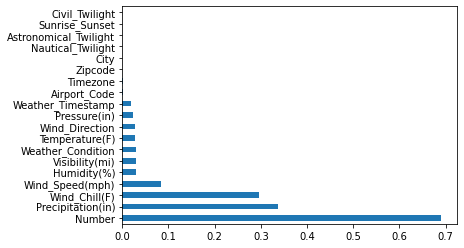

In [33]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Based on the results above, weather conditions including wind speed, wind chill, precipitation, and number have high percentage of missing values. Therefore, these attributes are not useful for getting insights on accidents in the US.

Attributes analysed for this project based on how they are related to accidents in the US are:

1. City
2. Start Time
3. Start Lat and Long
4. Weather Conditions

## 1. City
Different cities have varying accident frequency based on factors such as population, driving habits, traffic conditions and much more. The data includes accident records for 10,658 cities in the US.

In [39]:
cities = df.City.unique()
len(cities)

10658

### Number of accidents by City

In [40]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles      39984
Miami            36233
Charlotte        22203
Houston          20843
Dallas           19497
                 ...  
Vickery              1
Mackinaw City        1
Findley Lake         1
Quaker Hill          1
Trinchera            1
Name: City, Length: 10657, dtype: int64

In [41]:
cities_by_accident[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

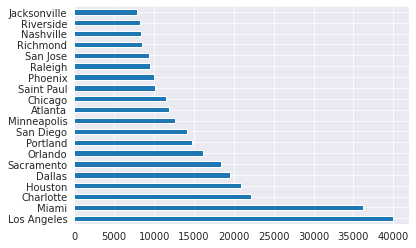

In [42]:
cities_by_accident[:20].plot(kind='barh')

Based on the results from the data, Los Angeles has the most accidents followed by Miami, Charlotte, Houston and Dallas. However, we know New york is one of the most populated cities in the US. So, lets inspect the accident results in New York.

In [ ]:
df[df['City'] == 'New York']

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
32547,32547,A-2749147,2,2016-11-30 15:58:59,2016-11-30 21:58:59,40.850020,-73.943990,40.853290,-73.960640,0.899,Between Amsterdam Ave/Harlem River Dr and Huds...,NaN,George Washington Brg,R,New York,New York,NY,10033,US,US/Eastern,KNYC,2016-11-30 15:51:00,53.1,NaN,93.0,29.80,2.0,East,6.9,0.09,Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
32593,32593,A-2749193,2,2016-11-30 17:31:55,2016-11-30 23:31:55,40.771460,-73.946580,40.768780,-73.949060,0.226,At 79th St - Accident.,NaN,FDR Dr S,R,New York,New York,NY,10028,US,US/Eastern,KNYC,2016-11-30 17:33:00,53.1,NaN,93.0,29.81,2.5,East,3.5,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
32683,32683,A-2749283,3,2016-11-26 22:57:16,2016-12-01 04:44:45,40.762979,-73.973938,40.762956,-73.973953,0.002,Between 65th St/66th St and 34th St - Accident.,2.0,W 57th St,L,New York,New York,NY,10019-3903,US,US/Eastern,KNYC,2016-11-26 22:51:00,41.0,38.0,73.0,30.07,10.0,West,4.6,NaN,Clear,True,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night
32901,32901,A-2749501,3,2016-12-01 12:14:13,2016-12-01 18:14:13,40.744340,-73.971240,40.748080,-73.967930,0.311,At 42nd St/Exit 9 - Accident.,NaN,FDR Dr N,R,New York,New York,NY,10016,US,US/Eastern,KNYC,2016-12-01 11:51:00,53.1,NaN,50.0,29.64,10.0,North,NaN,NaN,Clear,True,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
33089,33089,A-2749689,2,2016-12-01 18:54:49,2016-12-02 00:54:49,40.710680,-74.002720,40.701550,-73.991290,0.870,Between Centre St and Cadman Plaza - Accident.,NaN,Brooklyn Bridge Walkway,R,New York,New York,NY,10038,US,US/Eastern,KJRB,2016-12-01 18:55:00,48.2,NaN,54.0,30.41,NaN,West,13.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514069,1514069,A-4237412,2,2019-08-20 14:54:26,2019-08-20 15:23:31,40.737500,-73.974270,40.739760,-73.972910,0.172,At I-495/Midtown Tunnel/Exit 8 - Accident. Lan...,NaN,FDR Dr N,R,New York,New York,NY,10010,US,US/Eastern,KNYC,2019-08-20 14:51:00,86.0,86.0,49.0,29.93,10.0,VAR,5.0,0.00,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1514615,1514615,A-4237958,2,2019-08-21 17:32:29,2019-08-21 18:01:32,40.850020,-73.943992,40.853290,-73.960640,0.899,Between RT-9A/Henry Hudson Pky and Hudson Ter/...,NaN,George Washington Brg,R,New York,New York,NY,10033,US,US/Eastern,KNYC,2019-08-21 17:51:00,79.0,79.0,82.0,29.71,4.0,VAR,3.0,0.01,Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1515150,1515150,A-4238493,2,2019-08-22 08:16:10,2019-08-22 08:44:59,40.760390,-73.962860,40.752581,-73.944912,1.083,At Beginning of Bridge - Accident. Left lane b...,NaN,Ed Koch Queensboro Brg,R,New York,New York,NY,10022,US,US/Eastern,KNYC,2019-08-22 07:51:00,76.0,76.0,82.0,29.73,10.0,CALM,0.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1515170,1515170,A-4238513,2,2019-08-22 15:14:32,2019-08-22 15:44:00,40.748080,-73.967930,40.751223,-73.965275,0.258,At 49th St/Exit 10 - Accident. Left lane blocked.,NaN,FDR Dr N,R,New Y

In [91]:
df[df['City'] == 'Los Angeles']

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5360,A-2721960,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.09256,-118.206220,34.092560,-118.206220,0.000,At Avenue 43 - Accident.,NaN,CA-110 N,R,Los Angeles,Los Angeles,CA,90031,US,US/Pacific,KCQT,2016-03-22 19:47:00,64.0,NaN,24.0,30.00,10.0,NNW,9.2,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Night,Night,Day,Day
5364,A-2721964,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.94819,-118.279730,33.946760,-118.279750,0.099,At Century Blvd - Accident.,NaN,I-110 S,R,Los Angeles,Los Angeles,CA,90003,US,US/Pacific,KHHR,2016-03-22 20:53:00,64.0,NaN,23.0,30.02,10.0,NNW,11.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
5379,A-2721979,3,2016-03-23 07:59:47,2016-03-23 13:59:47,34.02330,-118.172880,34.021380,-118.173390,0.136,At Whittier Blvd/Olympic Blvd - Accident.,NaN,Long Beach Fwy S,R,Los Angeles,Los Angeles,CA,90022,US,US/Pacific,KCQT,2016-03-23 07:47:00,55.9,NaN,53.0,30.11,10.0,Calm,NaN,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
5397,A-2721997,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.14470,-118.278650,34.141040,-118.277840,0.257,At Colorado St - Accident.,NaN,Golden State Fwy S,R,Los Angeles,Los Angeles,CA,90027,US,US/Pacific,KCQT,2016-03-23 11:47:00,73.9,NaN,14.0,30.15,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
5399,A-2721999,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.09914,-118.251853,34.099817,-118.251396,0.054,At I-5/Golden State Fwy - Accident. Left lane ...,NaN,CA-2 S,R,Los Angeles,Los Angeles,CA,90039,US,US/Pacific,KCQT,2016-03-23 11:47:00,73.9,NaN,14.0,30.15,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515619,A-4238962,2,2019-08-22 17:07:14,2019-08-22 17:36:02,34.03693,-118.438770,34.025590,-118.429180,0.957,At I-10/Santa Monica Fwy - Accident.,NaN,San Diego Fwy S,R,Los Angeles,Los Angeles,CA,90064,US,US/Pacific,KSMO,2019-08-22 16:51:00,72.0,72.0,76.0,29.57,10.0,SW,8.0,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516027,A-4239370,3,2019-08-23 04:04:48,2019-08-23 04:33:53,34.07579,-118.276680,34.074310,-118.272250,0.273,At Benton Way/Rampart Blvd/Exit 5A - Accident.,NaN,Hollywood Fwy S,R,Los Angeles,Los Angeles,CA,90026,US,US/Pacific,KCQT,2019-08-23 03:52:00,67.0,67.0,79.0,29.62,7.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1516031,A-4239374,2,2019-08-23 12:52:31,2019-08-23 13:20:14,34.02379,-118.276390,34.025760,-118.275290,0.150,At 28th St - Accident.,NaN,Harbor Fwy N,R,Los Angeles,Los Angeles,CA,90007,US,US/Pacific,KCQT,2019-08-23 12:52:00,81.0,81.0,49.0,29.66,8.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516034,A-4239377,2,2019-08-23 13:42:50,2019-08-23 14:10:06,34.07061,-118.263910,34.069740,-118.261550,0.148,At Glendale Blvd/Union Ave - Accident.,NaN,Hollywood Fwy S,R,Los Angeles,Los Angeles,CA,90026,US,US/Pacific,KCQT,2019-08-23 13:52:00,82.0,82.0,47.0,29.65,9.0,CALM,0.0,0.0,Fair,False,False,False,False

The data on New York is not complete and has errors and that is the reason this needs further examination. The severity of accidents in the data for New York looks similar to that of Los Angeles with the rate of 2, however, we cannot ascertain that due to data not being complete for the city of New York.

Below is a distribution plot showing accidents by cities

In [24]:
import seaborn as sns
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


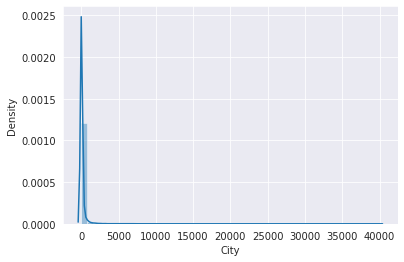

In [56]:
sns.distplot(cities_by_accident)
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]

In [47]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [45]:
len(high_accident_cities)/len(cities)

0.023550384687558643

Most cities have less than 1000 accidents. We will identify cities with high accidents as cities with accidents greater than 1000 and the cities with low accidents as cities with accidents with less than 1000 accidents.

Less than 2% of cities have less than 1000 yearly accidents.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


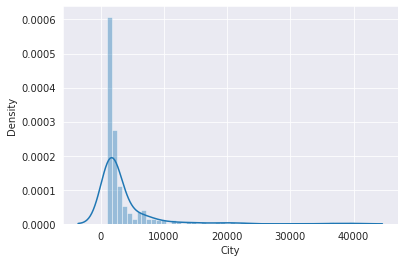

In [49]:
sns.distplot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


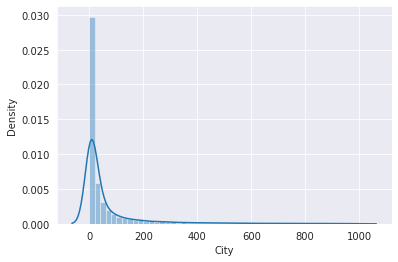

In [50]:
sns.distplot(low_accident_cities)

In [48]:
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


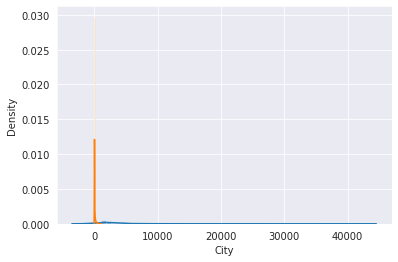

In [ ]:
len(high_accident_cities) / len(cities)
sns.distplot(high_accident_cities)
sns.distplot(low_accident_cities)

After discovering the density of accidents and the cities with most accidents, we plot the histogram to identify the cities with most accidents more accurately.

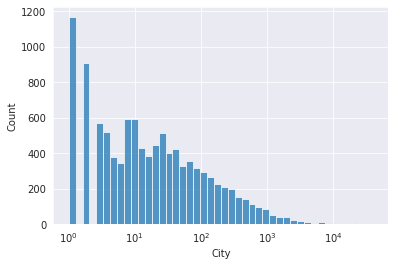

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)

About 1200 cities have accidents with single digits 0 -100 accidents. Further analysis is required to make sure that no data is missing for the cities.

In [ ]:
cities_by_accident[cities_by_accident ==1]

Eagle Nest                 1
Mammoth Spring             1
Manchester Center          1
North Brentwood            1
Fertile                    1
                          ..
Martinton                  1
Braddock                   1
Leipsic                    1
Aberdeen Proving Ground    1
Brownstown                 1
Name: City, Length: 1167, dtype: int64

For 1,167 cities, only 1 accident was reported. This makes up more than 10% of the data which cannot be used to make any useful insights. Therefore, over 1200 cities have reported just one accident.

## 2. Start Time
It is important to note the relationship between the start time and the frequency of accidents. This will hellp us understand what time of day, week or month with more accidents. In addition, get insights on whether weather is among the factors in frequency of accidents.

In [18]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [19]:
pd.to_datetime(df.Start_Time)

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

In [20]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [21]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

In [22]:
df.Start_Time = pd.to_datetime(df.Start_Time)

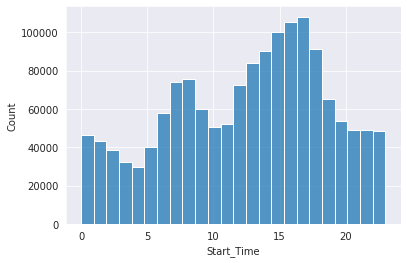

In [25]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

### Frequency of accidents by the hour

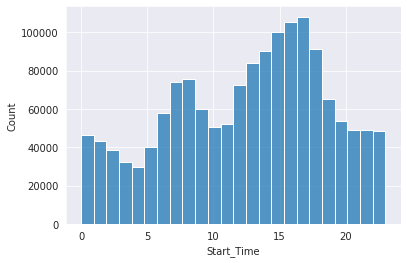

In [ ]:
sns.histplot(df.Start_Time.dt.hour, bins=24, kde=False)

A high percentage of accidents occur between 6-10 am and 3-6 pm due to rush hour commute to and from work.

### Frequency of accidents during the week 

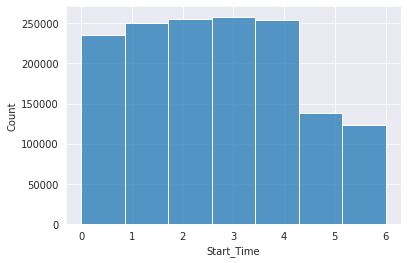

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7, kde=False)

The distribution of accidents by hour on weekends and weekdays is significantly different. There are more accidents froon weekdays in comparison to Saturday and Sunday. It might be due to the fact that there is less commute over the weekend.

### Distribution of accidents on a weekday (Sunday) and a workday (Monday)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


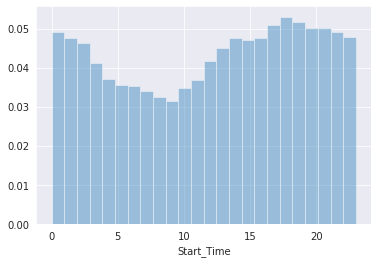

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


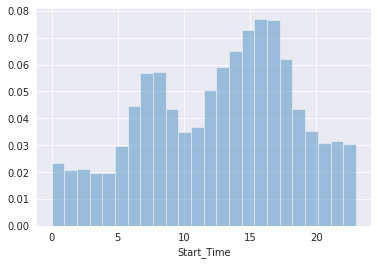

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On Sundays, the peak in frequency of accidents occurs between 8 am and 3 pm but on Monday the peak hours are around rush hour ranging from 6 am to 10 am and 3 pm to 6 pm. Therefore, the best time to leave for work and travel back work is 4 am and 10 pm respectively.

### Frequency of accidents over the months

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


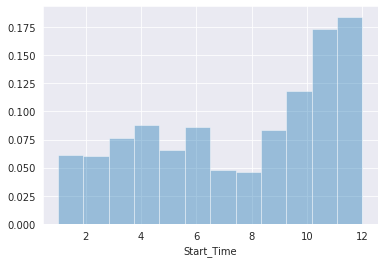

In [ ]:
sns.distplot(mondays_start_time.dt.month, bins=12, kde=False, norm_hist=True)

Months towards the end and beginning of the year have higher number of accidents in comparison to the summer months. It might also be due to weather effect on roads and driveability.

### Accidents over the years 2019 and 2020

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


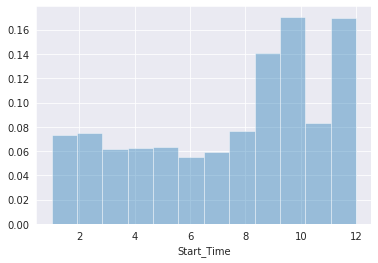

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month,bins=12, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


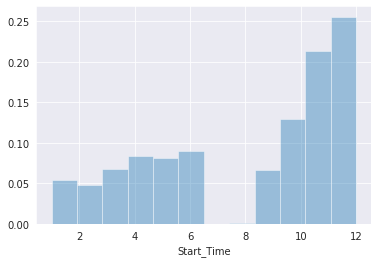

In [ ]:
df_2020 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2020.Start_Time.dt.month,bins=12, kde=False, norm_hist=True)

The results from the year 2019 and 2020 indicate that the last months in both years have more accidents than the early months of the year. We do know that the pandemic did play a very significant role in reducing the frequency of accidents in the year 2020, however, the trend remains the same.

## 3. Start Latitude and Longitude


In [36]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [35]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

In [34]:
sample_df = df.sample(int(0.1 * len(df)))

The scatter plot below shows the frequency of accidents by location based on the latitude and longitude data. Based on the results, the cities in the states in the middle of the US have lesser accidents in comparison to the east coast and the west coast cities.

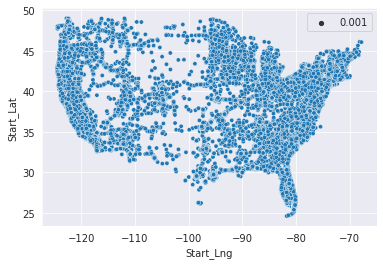

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [42]:
import folium

In [43]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.108909999999995, -83.09286)

Below is a 100 sample of the start latitude and longitude coordinates for the purposes of creating a heatmap.

In [39]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
  print(x[1])

990845     37.410721
773001     34.023435
1324750    39.797255
1281397    33.311231
1064227    38.501439
             ...    
102751     37.286690
993396     40.475990
219959     38.497543
1336890    26.009840
258363     33.984367
Name: Start_Lat, Length: 100, dtype: float64
990845    -121.992174
773001    -117.750504
1324750    -86.118109
1281397   -111.721170
1064227   -121.517826
              ...    
102751    -109.545440
993396     -74.406670
219959     -90.308397
1336890    -80.223230
258363    -118.063634
Name: Start_Lng, Length: 100, dtype: float64


In [47]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
  print(x[0])

Start_Lat
Start_Lng


In [30]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))

[(40.108909999999995, -83.09286),
 (39.86542, -84.0628),
 (39.10266, -84.52468),
 (39.10148, -84.52341),
 (41.062129999999996, -81.53784),
 (39.172393, -84.49279200000001),
 (39.06324, -84.03243),
 (39.06708, -84.05855),
 (39.77565, -84.18603),
 (41.37531, -81.82016999999999),
 (40.702247, -84.075887),
 (40.10931, -82.96849),
 (39.19288, -84.47723),
 (39.13877, -84.53394),
 (41.4739, -81.704233),
 (39.582242, -83.677814),
 (40.151785, -81.312635),
 (40.151747, -81.312682),
 (39.972409999999996, -82.84695),
 (39.9838, -82.85656999999999),
 (40.02664, -82.9944),
 (41.679361, -83.573037),
 (40.99613, -85.26613),
 (39.0381, -84.59243000000001),
 (40.03386, -82.99601),
 (39.85798, -84.28181),
 (39.15267, -84.5395),
 (39.307320000000004, -85.95982),
 (39.77572, -84.04815),
 (39.97643, -83.12306),
 (39.58595, -85.82518),
 (39.3638, -85.51659000000001),
 (39.45132, -85.62516),
 (39.75067, -84.14148),
 (39.2675, -81.49929),
 (39.86025, -85.96623000000001),
 (41.95677, -83.67214),
 (38.27401, -8

In [ ]:
from folium.plugins import HeatMap


In [ ]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
folium.plugins.HeatMap(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))).add_to(map)
map

4. Weather Conditions

Below is an analysis of the data to identify the relationship between weather conditions and the frequency of accidents.

In [54]:
df.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [58]:
weather = df.Weather_Condition.unique()
len(weather)

117

In [59]:
weather_by_accident = df.Weather_Condition.value_counts()
weather_by_accident

Fair                                   465252
Mostly Cloudy                          193595
Clear                                  180223
Cloudy                                 161291
Partly Cloudy                          133102
                                        ...  
Low Drifting Snow                           1
Sleet / Windy                               1
Heavy Thunderstorms with Small Hail         1
Hail                                        1
Heavy Blowing Snow                          1
Name: Weather_Condition, Length: 116, dtype: int64

Out of 116 weather conditions, the most reported weather condition during accidents were fair, mostly cloudy, clear, cloudy and partially cloudy.

In [61]:
weather_by_accident[:20]

Fair                     465252
Mostly Cloudy            193595
Clear                    180223
Cloudy                   161291
Partly Cloudy            133102
Overcast                  87853
Light Rain                72511
Scattered Clouds          47061
Light Snow                22113
Fog                       19777
Haze                      17706
Rain                      17389
Fair / Windy               6631
Heavy Rain                 6119
Light Drizzle              4307
Mostly Cloudy / Windy      3612
Smoke                      3608
Cloudy / Windy             3300
Snow                       2730
Partly Cloudy / Windy      2125
Name: Weather_Condition, dtype: int64

It is important to note that the defined weather conditions have subjective attributes such as partly cloudy/windy or cloudy/windy which may be the same or different depending on the driver involved in an accident.

Below is a plot showing the distribution of accidents by weather conditions.

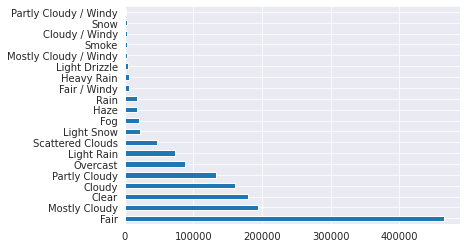

In [63]:
weather_by_accident[:20].plot(kind='barh')

In [72]:
high_accident_weather = weather_by_accident[weather_by_accident >= 1000]
low_accident_weather = weather_by_accident[weather_by_accident < 1000]

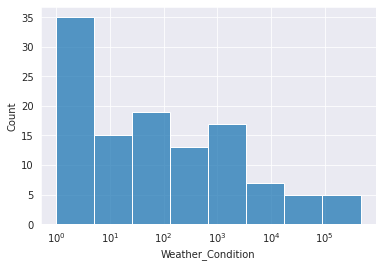

In [73]:
sns.histplot(weather_by_accident, log_scale=True)

In [90]:
weather_by_accident[weather_by_accident ==4]


Light Snow and Sleet / Windy    4
Light Sleet / Windy             4
Heavy Snow with Thunder         4
Volcanic Ash                    4
Thunder / Wintry Mix / Windy    4
Name: Weather_Condition, dtype: int64

There are about 35 accidents for each weather condition reported once in the particular accident. Severe weather conditions have been mentioned more in an accident report in comparison to partially cloudy weather. However, it is not frequent that we have volcanic ash and hail and other severe weather conditions that have been reported in an accident.

Conclusion: 

There is not enough data for the city of New York and more analysis will be conducted on the New York Data once the data is available. In addition, based on the results from this data, accidents are more frequent in winter months and during rush hour. 

Recommendation is to ensure that traffic signs, lights and control are appropriately implemented, weather advisory alerts cover all types of weather cha, cities ensure resources are readily available to clear any obstacles and safe driving publications and workshops are ephasized to all drivers in order to ensure awareness and alertness of drivers.

Acknowledgements

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

In [88]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/haikangowi/us-accidents-analysis


'https://jovian.ai/haikangowi/us-accidents-analysis'